question 1

In [7]:
import numpy as np
np . random . seed (42)

A = np . array ( [ [ 1 , 2.0 ] ,
[ 1 , 3.0 ] ,
[ 1 , 4.5 ] ,
[ 1 , 5.5 ]
] )

y = np . array ( [
[ 3.1 ] ,
[ 4.9 ] ,
[ 8.2 ] ,
[ 10.1 ]
] )
m = len ( y )

# normal
W_normal = np.linalg.inv(A.T @ A) @ A.T @ y
print("with normal : " ,W_normal)

# BGD
def BGD(A, y, alpha=0.01, max_iters=1000):
    m, n = A.shape
    w = np.zeros((n, 1))
    y = y.reshape(-1, 1)
    cost_history = []

    for _ in range(max_iters):
        h = A @ w
        error = h - y
        gradient = (A.T @ error) / m
        w = w - alpha * gradient
        cost = (error.T @ error)[0, 0] / (2 * m)
        cost_history.append(cost)
    return w , cost_history
W_bgd , cost_bgd = BGD(A, y)
print("with BGD = " ,W_bgd)

#SVD
def SVD(A, y):
  U, S, Vt = np.linalg.svd(A.T @ A)
  S_inv = np.diag(1 / S)
  w = Vt.T @ S_inv @ U.T @ A.T @ y
  return w
W_svd = SVD(A, y)
print("with SVD = " ,W_svd)


with normal :  [[-1.04137931]
 [ 2.03103448]]
with BGD =  [[-0.55217831]
 [ 1.9146829 ]]
with SVD =  [[-1.04137931]
 [ 2.03103448]]


In [8]:
noise = np.random.rand(m, 1) * 0.0001
A_collinear = np.hstack( (A, A[:,[1]] + noise))

W2_noraml = np.linalg.inv(A_collinear.T @ A_collinear) @ A_collinear.T @ y
print("with normal : " ,W2_noraml)

W2_svd = SVD(A_collinear, y)
print("with SVD = " ,W2_svd)



with normal :  [[-8.53782625e-01]
 [ 3.43827452e+03]
 [-3.43623267e+03]]
with SVD =  [[-8.53774428e-01]
 [ 3.43828441e+03]
 [-3.43624257e+03]]


question 2

/tmp/ipython-input-2728762082.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_mpg = pd.read_csv(url,names=column_names,na_values = '?',delim_whitespace=True)


with SGD =  [[ 0.51929896]
 [-4.42605614]]
cost with SGD =  [np.float64(18368.73389487064), np.float64(21164.761275826146), np.float64(19687.921641479676), np.float64(18317.16769266166), np.float64(17904.9974356247), np.float64(16544.39358053761), np.float64(16366.043577489043), np.float64(16814.22400891433), np.float64(19342.899483479825), np.float64(16835.908675074632)]
with BGD =  [[ 0.        ]
 [-6.06761045]]
cost with BGD =  [np.float64(286.8273755553995), np.float64(286.8273755545646), np.float64(286.82737555374644), np.float64(286.8273755529446), np.float64(286.82737555215857), np.float64(286.82737555138834), np.float64(286.8273755506333), np.float64(286.8273755498934), np.float64(286.8273755491681), np.float64(286.8273755484574)]


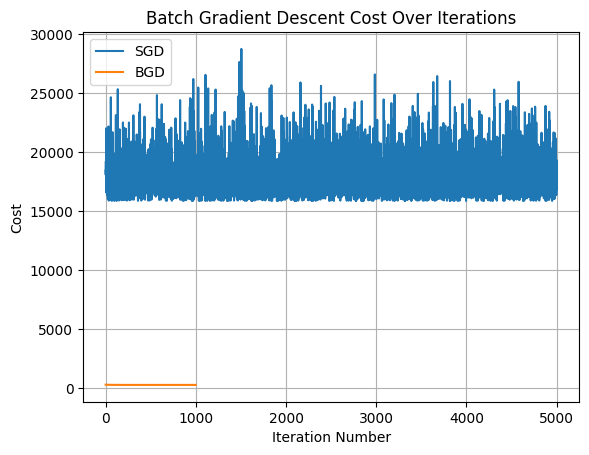

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


scaler = StandardScaler()
url = 'auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','ModelYear','Origin','CarName']
data_mpg = pd.read_csv(url,names=column_names,na_values = '?',delim_whitespace=True)
data_mpg = data_mpg.dropna(subset=['Horsepower'])
data_mpg['Horsepower'] = data_mpg['Horsepower'].astype(float)

A = np.column_stack((np.ones(len(data_mpg)) , data_mpg['Horsepower'].values ))
A_scaled = scaler.fit_transform(A)
y = data_mpg['MPG'].values

def SGD(A, y, learn_rate=0.01, max_iters=5000):
  w = np.random.randn(2, 1)
  rows = len(A)
  cost_history = []
  for i in range(max_iters):
      for j in range(rows):
          random_index = np.random.randint(rows)
          xi = A[random_index:random_index+1]
          yi = y[random_index:random_index+1]
          prediction = xi.dot(w)
          error = prediction - yi
          gradients = 2 * xi.T.dot(error)
          w = w - learn_rate * gradients
      error = A.dot(w) - y
      cost = (error.T @ error)[0, 0] / (2 * m)
      cost_history.append(cost)
  return w , cost_history

W_SGD , cost_sgd = SGD(A_scaled, y)
print("with SGD = " ,W_SGD)
print("cost with SGD = " , cost_sgd[-10:])

W_BGD , cost_bgd = BGD(A_scaled, y)
print("with BGD = " ,W_BGD)
print("cost with BGD = " , cost_bgd[-10:])

plt.plot(np.arange(len(cost_sgd)), cost_sgd , label='SGD')
plt.plot(np.arange(len(cost_bgd)), cost_bgd , label='BGD')
plt.xlabel('Iteration Number')
plt.ylabel('Cost')
plt.title('Batch Gradient Descent Cost Over Iterations')
plt.grid(True)
plt.legend()
plt.show()


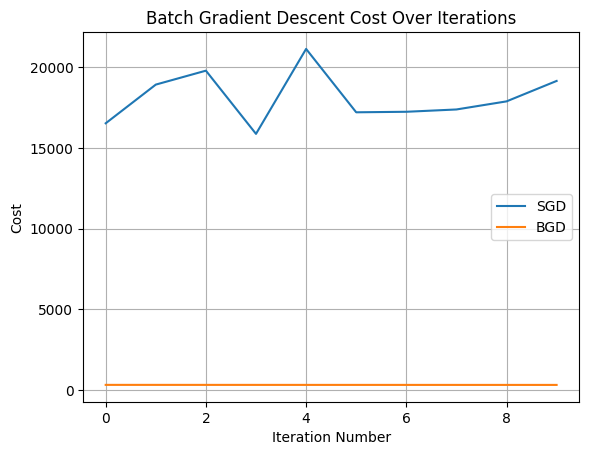

[np.float64(305.2369132653061), np.float64(304.87056346404415), np.float64(304.5115040238274), np.float64(304.1595898664708), np.float64(303.8146788008457), np.float64(303.4766314654266), np.float64(303.1453112719822), np.float64(302.8205843503874), np.float64(302.5023194945324), np.float64(302.19038810930886)]
[np.float64(286.8273755553995), np.float64(286.8273755545646), np.float64(286.82737555374644), np.float64(286.8273755529446), np.float64(286.82737555215857), np.float64(286.82737555138834), np.float64(286.8273755506333), np.float64(286.8273755498934), np.float64(286.8273755491681), np.float64(286.8273755484574)]


In [16]:
plt.plot(np.arange(len(cost_sgd[:10])), cost_sgd[:10] , label='SGD')
plt.plot(np.arange(len(cost_bgd[:10])), cost_bgd[:10] , label='BGD')
plt.xlabel('Iteration Number')
plt.ylabel('Cost')
plt.title('Batch Gradient Descent Cost Over Iterations')
plt.grid(True)
plt.legend()
plt.show()
print(cost_bgd[:10])
print(cost_bgd[-10:])

question 3

In [23]:
A = np.hstack((np.ones(len(data_mpg)) , data_mpg['Horsepower'].values ))
A = np.hstack(A , data_mpg['Horsepower'].values ** 2)
#A = np.column_stack( A , )
A_scaled = scaler.fit_transform(A)
y = data_mpg['MPG'].values

W_SGD , cost_sgd = SGD(A_scaled, y)
print("with SGD = " ,W_SGD)

plt.plot(A_scaled, y , label='SGD')
plt.plot(A_scaled, A_scaled @ W , label='BGD')
plt.xlabel('Iteration Number')
plt.ylabel('Cost')
plt.title('Batch Gradient Descent Cost Over Iterations')
plt.grid(True)
plt.legend()
plt.show()


TypeError: hstack() takes 1 positional argument but 2 were given